# Problem Statement

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

# Expected Output
Classifying the passengers in test.csv whether they survived the incident or not.

In [2]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


## Analyizing the data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# train
train.describe() # Multiple coloumns like Cabin, Age,Embarked have NaN values


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [6]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


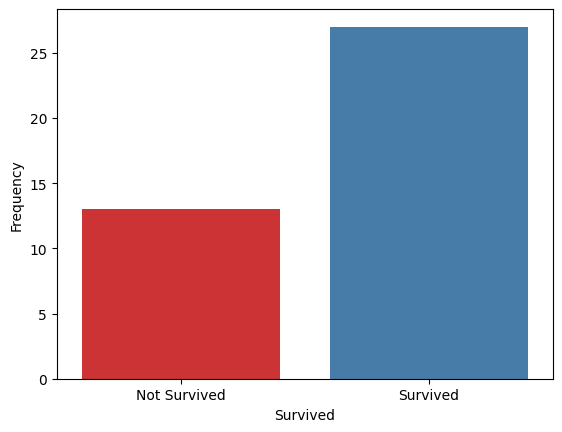

In [7]:
Children = train[train['Age'] < 5]
# Children = Children[Children['Survived']==1]
Children.shape
# Children[["Age","Survived"]].mean().sort_values(by='Survived', ascending=False)
sns.countplot(data=Children, x='Survived', palette="Set1")
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


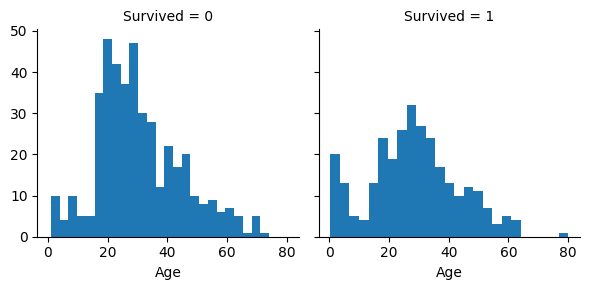

In [8]:
age_plot = sns.FacetGrid(train, col='Survived')
age_plot.map(plt.hist, 'Age',bins=25)
plt.show()

c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


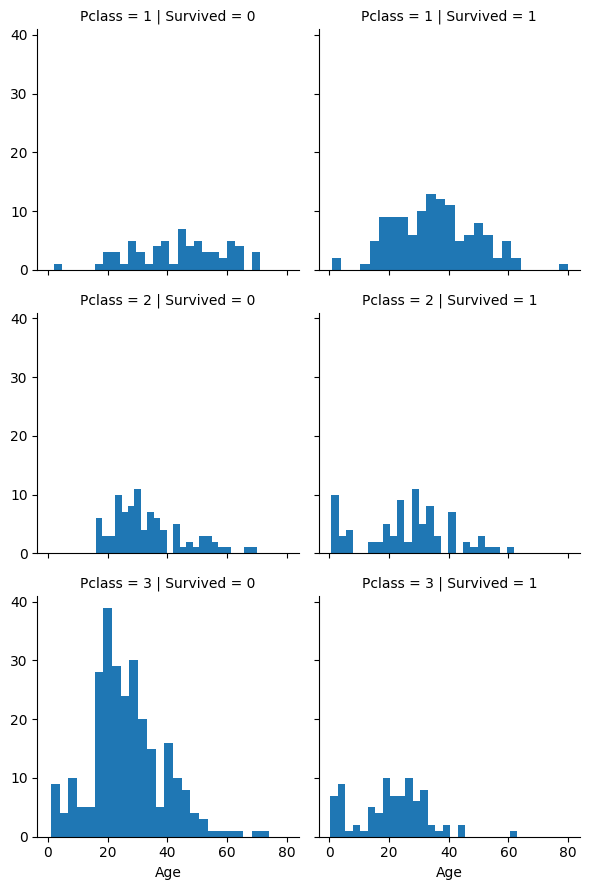

In [9]:
pclass = sns.FacetGrid(train, col='Survived', row='Pclass')
pclass.map(plt.hist,'Age',bins=25)

In [10]:
duplicates = train[train.duplicated(subset=['Cabin', 'Name'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


# Observations
- There are 891 unique names in the dataset, with no name duplicates.
- The dataset includes a sex variable with two possible values. Males make up the majority at 65%, with 577 males out of 891 passengers.
- The Cabin variable contains duplicate values, indicating that several passengers shared the same cabin.
- 38% samples survived the incident out of the actual survival rate at 32%.
- People aged between 20 to 35 had the highest survival rate apart from children(aged less than 5 years). Therefore Age can be an important feature for model training.
- Passenger class had a significant impact on survival rates, with most first-class passengers surviving, while third-class passengers had the lowest survival rate. Additionally, infants in the lower classes had a higher chance of survival, reflecting the "women and children first" protocol, and passenger class correlated with differences in the age distribution of passengers.

### Following steps are taken to simplify & improve the analysis of survival prediction.
# Add representations for each point
- Completing the NaN values in Age column.
- The Ticket feature should be considered for removal from the analysis due to its high ratio of duplicates (22%) and the potential lack of correlation with survival. 

- The Cabin feature should be considered for removal because it is highly incomplete and contains many null values in both the training and test datasets. 

- The PassengerId feature can be dropped from the training dataset as it does not contribute to predicting survival and is primarily used for identification purposes. 

- The Name feature may also be dropped from the analysis as it is relatively non-standard and may not have a direct correlation with survival.



# Data Wrangling

In [11]:
# Dropping the unwanted columns

train = train.drop(['Cabin','Ticket','PassengerId','Name','Fare','Embarked','SibSp','Parch'],axis=1)
test = test.drop(['Cabin','Ticket','PassengerId','Name','Fare','Embarked','SibSp','Parch'],axis=1)



In [12]:
# Converting Features of string type to Integers
train['Sex'] = train['Sex'].map({'female': 1, 'male':0}).astype(int)
test['Sex'] = test['Sex'].map({'female': 1, 'male':0}).astype(int)


In [13]:
# Replacing NaN values in Age with a random number between mean and standard deviation of Age

mean = train['Age'].mean()
std = train['Age'].std()

random_age = np.random.uniform(mean - std, mean + std, train['Age'].isna().sum())

# Replace NaN values in the 'Age' column with random numbers
train.loc[train['Age'].isna(), 'Age'] = random_age

mean = test['Age'].mean()
std = test['Age'].std()

random_age = np.random.uniform(mean - std, mean + std, test['Age'].isna().sum())

# Replace NaN values in the 'Age' column with random numbers
test.loc[test['Age'].isna(), 'Age'] = random_agemean = test['Age'].mean()
std = test['Age'].std()

random_age = np.random.uniform(mean - std, mean + std, test['Age'].isna().sum())

# Replace NaN values in the 'Age' column with random numbers
test.loc[test['Age'].isna(), 'Age'] = random_age


# Model Predictions
Here we will compare the performance of following models on our processed data
- Decision Tree
- Random Forest 
- Support Vector Machines
- Logistic Regression
- Naive Bayes Classifier
- KNN

In [14]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]

In [15]:
columns_with_nan = train.columns[train.isna().any()].tolist()

In [16]:
test

,Pclass,Sex,Age
0,3,0,34.50000
1,3,1,47.00000
2,2,0,62.00000
3,3,0,27.00000
4,3,1,22.00000
...,...,...,...
413,3,0,30.27259
414,1,1,39.00000
415,3,0,38.50000
416,3,0,30.27259


In [17]:
# Random Forest

Random_forest = RandomForestClassifier(n_estimators=100)
Random_forest.fit(X_train, Y_train)
Y_pred = Random_forest.predict(test)
Accuracy_random_forest = round(Random_forest.score(X_train, Y_train) * 100, 2)
Accuracy_random_forest

91.69

In [18]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(test)
Accuracy_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
Accuracy_decision_tree

91.69

In [19]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(test)
Accuracy_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
Accuracy_gaussian

79.01

In [20]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(test)
Accuracy_knn = round(knn.score(X_train, Y_train) * 100, 2)
Accuracy_knn

85.63

In [21]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(test)
Accuracy_svc = round(svc.score(X_train, Y_train) * 100, 2)
Accuracy_svc

63.75

In [28]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(test)
Accuracy_log = round(logreg.score(X_train, Y_train) * 100, 2)
Accuracy_log

78.56

c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Rameshwar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype i

<Axes: >

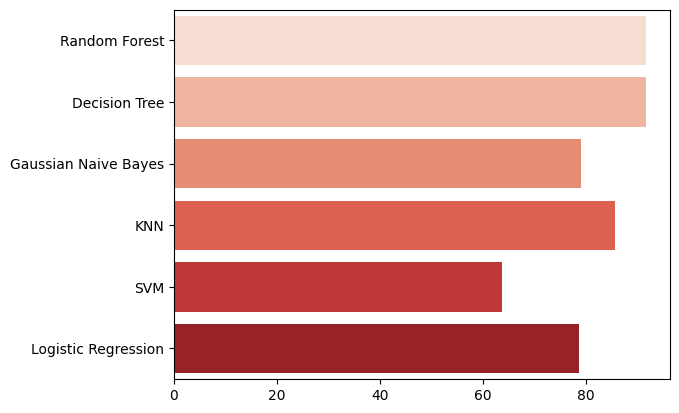

In [26]:
models = ["Random Forest","Decision Tree","Gaussian Naive Bayes","KNN","SVM","Logistic Regression"]
Accuracies = [Accuracy_random_forest,Accuracy_decision_tree,Accuracy_gaussian,Accuracy_knn,Accuracy_svc,Accuracy_log]

sns.barplot(x=Accuracies,y=models,palette="Reds")